## **Proyecto:** Clasificación binaria de cáncer de piel utilizando transfer learning
### **Autor:** Manuel Mena
### **Fecha:** 25/08/22 

## **1. Introducción**

### **1.1 ¿Qué es el cáncer de piel?** 

El cáncer es una enfermedad en la cual las células del cuerpo comienzan a multiplicarse sin control. Cuando el cáncer se origina en la piel, se denomína cáncer de piel [1]

Entre los tipos de cáncer de piel tenemos el carcinoma basocelular y el carcinoma espinocelular. Ambas tienen altas probabilidades de curación, pero pueden causar desfiguración y ser costosos de tratar. El melanoma, el tercer tipo de cáncer de piel más común, es muy peligroso y causa la mayor cantidad de muertes [2]

### **1.2 Diagnóstico**

Para diagnosticar cáncer de piel, es probable que el médico efectúe lo siguiente:
- Examinar la piel: El médico puede observar la piel para determinar si es posible que los cambios que esta sufre sean cáncer de piel. Probablemente se necesiten otros análisis para confirmar el diagnóstico

- Extraer una muestra de piel sospechosa para análisis (biopsia de piel): El médico puede extraer piel con aspecto sospechoso para realizar análisis de laboratorio. Una biopsia puede determinar si tienes cáncer de piel, y en ese caso de que tipo se trata.

Considerando la seriedad de esta enfermedad es que investigadores han desarrollado una variedad de técnicas de detección del cáncer de piel. Parámetros de lesión como la simetría, color, tamaño, forma y otros son utilizados para detectar el cáncer y distinguir uno benigno de otro con melanoma.[3]

En la imagen 1 podemos observar un melanoma cuyos parámetros de lesión corresponden a la simetría y color:



![Melanoma](https://images.ctfassets.net/1ny4yoiyrqia/euJvSEAs5Qd0Zansym1gi/7dff363bf4546b8a56e1cf185a1a0950/melanoma-symptoms-sore.png) 

**Imagen 1**. Un melanoma que luce como una herida [i.1]

### **1.3 Uso de Deep Learning en la detección de cáncer de piel** 

A fin de diagnosticar rápidamente el cancer de piel en sus primeras etapas, diversos científicos han hecho investigaciones desarrollando algoritmos de análisis de imágenes de computadora [4]. La clasificación de imágenes ha mejorado debido al uso de redes neuronales convolucionales (CNN por sus siglas en inglés) como las estudiadas por Fukushima (1988) y luego Le-Cunn (1990). 

CNNs básicamente simulan el sistema de reconocimiento visual humano y son consideradas como tecnologías de vanguardia en clasificación de imágenes. El primer gran avance referido al cáncer de piel utilizó el modelo GoogLeNet Inception V3, y fue desarrollado por Esteva et al [5], utilizando 129,450 imágenes clínicas, obteniendo un accuracy de 72.1%.   


### **1.4 Uso del transfer learning** 
Las capacidades del deep learning están limitadas a la cantidad de datos que dispone para entrenar. Por ello, cuando no es posible hallar más datos, se puede utilizar como alternativa el transfer learning. 

Transfer learning (TL) se origina desde la teoría cognitiva, donde se plantea que el conocimiento puede transferirse a nivel paramétrico. Especificamente, en una CNN la clasificación de imágenes pueden ser aprendidas mediante el aprovechamiento de variables genéricas entrenadas para clasificación [6]. Particularmente se aprovechan los pesos de una red que hizo aprendizaje, se "congelan" y se añade unas capas extra a la arquitectura para que pueda aprender de las nuevas imagenes añadidas, evitando crear una red desde cero [7].

En la imagen 2 podemos observar que el proceso de una red neuronal es hacer una multiplicación de matrices, pasar cada resultado por una función de activación y luego disponer de un pronóstico que puede ser comparado con el valor real mediante una función de pérdida. Luego para actualizar los pesos hacemos el proceso de backpropagation, que se apoya en una fórmula de calculo diferencial para hallar nuevos pesos de forma iterativa, minimizando el error. Con TL reducimos las multiplicaciones matriciales de las capas bloqueadas.


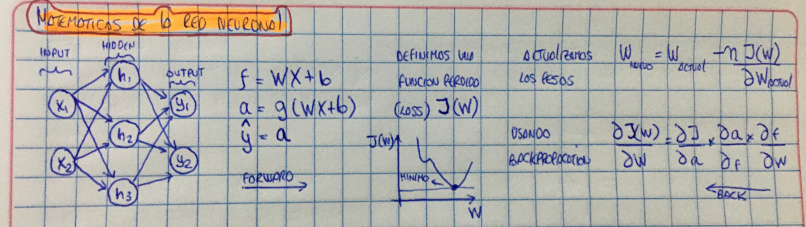

**Imagen 2.** Una arquitectura de red neuronal [i.2]

### **1.5 Objetivo del proyecto**

Este proyecto tiene como objetivo detectar cáncer de piel mediante deep learning, teniendo como datos datos provistos por Muhammad Rizwan desde un dataset de Kaggle [8]. Se tienen 3,297 imágenes a color de manchas en la piel consideradas como benignas (sin cáncer) y malignas (con cáncer), separadas en:  

- Dataset de aprendizaje: 1140 imágenes benignas y 937 imágenes malignas
- Dataset de validación: 300 imágenes benignas y 260 imágenes malignas
- Dataset de prueba: 360 imágenes benignas y 300 imágenes malignas

El enlace al dataset está en: https://drive.google.com/drive/folders/1Aid67MXI7ks0l3y3CsLv4om4n_5zG9dG

## **2. Procedimiento de aprendizaje**

Para el desarrollo de este proyecto, considerando que disponemos de pocas muestras y que nuestro interés es crear un clasificador de cáncer que pueda superar el nivel de accuracy de 72.1% obtenido por Esteva et al.

La estrategia para este aprendizaje será:

- Incrementar la cantidad de muestras mediante data augmentation, que mediante transformaciones como rotación (girar las imagenes algunos grados), flipeo (crear una imagen espejo reverso), ampliación (un zoom sobre la imagen), corrido (mover la imagen unos pixels horizontal y verticalmente) así como shear (transformacion lineal que inclina como con perspectiva).
- Descargar la arquitectura pre-entrenada VGG16, que es una CNN con 16 capas y filtros de 3x3 en las capas convolucionales. Esta arquitectura fue propuesta por el equipo de Visual Geometry Group, tiene como logros un buen desempeño en el dataset de Imagenet [9].
- Utilizar transfer learning con la arquitectura VGG16, congelando las capas entrenadas y añadiendo 3 capas, una donde se estire la capa previa (flatten), una densa con 256 parámetros y una final que clasifique.
- Observar el desempeño del accuracy del dataset de aprendizaje y validación, cuidando que no haga overfitting, mediante gráficas.
- Evaluar las métricas en el dataset de prueba, mediante la matriz de confusión.


## **3. Código implementado**

### **3.1 Plataforma**
Debido al uso intensivo de redes neuronales, el código implementado fue procesado en Google Colab, plataforma que permite a usuarios escribir y ejecutar código de python mediante un navegador de internet en una libreta Jupyter. Para tareas intensivas cuenta con máquinas virtuales provistas de aceleradores de computación matricial como GPUs y TPUs.

### **3.2 Copiado de datos**
A fin de hacer los resultados reproducibles, es necesario que las imágenes proporcionadas en el enlace sean copiadas a google drive, desde donde se podrá acceder con Google Colab. Esto se logra mediante un montado virtual de disco (drive mount) que sirve como carpeta para los archivos de imágenes.

In [ ]:
# Para acceder a los datos, accesamos a los mismos mediante nuestro disco virtual
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Paso 0. Cargar bibliotecas y módulos de funciones 
# Matrices ---------------------------------------------------------------------
import numpy as np
# Gráficas ---------------------------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Machine learning -------------------------------------------------------------
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Deep learning ----------------------------------------------------------------
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Funciones ad-hoc -------------------------------------------------------------
def plotImages(images_arr):
    """
    Esta función recibe un arreglo de imágenes generada por
    image data generator para poder mostrar los cambios 
    efectuados por las transformaciones
    Parámetros
    ----------
    images_arr: Arreglo que indexado por ruta, etiqueta e imágenes
    Resultado
    ---------
    Gráfica en matplotlib con 5 columnas de las transformaciones
    """
    fig, axes = plt.subplots(1, 5, figsize=(10,11))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
# Paso 1. Cargar los datos y rutas ---------------------------------------------
train_dir = '/content/drive/MyDrive/Colab Notebooks/train'
train_benign_dir = '/content/drive/MyDrive/Colab Notebooks/train/benign'
train_malign_dir = '/content/drive/MyDrive/Colab Notebooks/train/malignant'
valid_dir = '/content/drive/MyDrive/Colab Notebooks/validation'
valid_benign_dir = '/content/drive/MyDrive/Colab Notebooks/validation/benign'
valid_malign_dir = '/content/drive/MyDrive/Colab Notebooks/validation/malignant'
test_dir = '/content/drive/MyDrive/Colab Notebooks/test'
test_benign_dir = '/content/drive/MyDrive/Colab Notebooks/test/benign'
test_malign_dir = '/content/drive/MyDrive/Colab Notebooks/test/malignant'

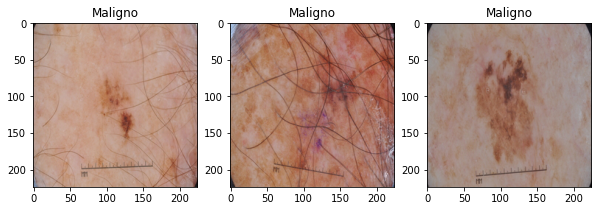

In [ ]:
# 1.1 Veamos imagenes de manchas malignas
mal_list = ['627.jpg','636.jpg','646.jpg']
mal_path = "../content/drive/MyDrive/Colab Notebooks/train/malignant/"
fig, ax = plt.subplots(1,3, figsize=(10,12))
for i in range(3):
  temp_path_m = mpimg.imread(mal_path + mal_list[i])
  ax[i].imshow(temp_path_m)
  ax[i].set_title('Maligno')
plt.show()

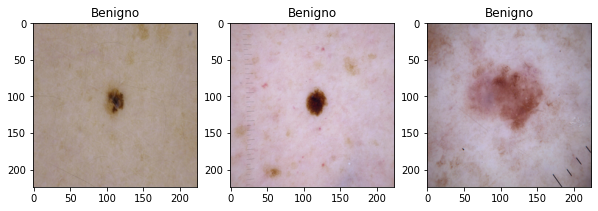

In [ ]:
# 1.2 Veamos imagenes de manchas benignas
ben_list = ['408.jpg','430.jpg','432.jpg']
ben_path = "../content/drive/MyDrive/Colab Notebooks/train/benign/"
fig, ax = plt.subplots(1,3, figsize=(10,12))
for i in range(3):
  temp_path_b = mpimg.imread(ben_path + ben_list[i])
  ax[i].imshow(temp_path_b)
  ax[i].set_title('Benigno')
plt.show()


In [ ]:
# Paso 2. Incrementar los datos con data augmentation --------------------------
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(200,200),
                                                    class_mode='binary',
                                                    batch_size=5)

valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size=(200,200),
                                                    class_mode='binary',
                                                    batch_size=5)

test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(200,200),
                                                  class_mode='binary',
                                                  batch_size=5,
                                                  shuffle=False)

Found 2077 images belonging to 2 classes.
Found 560 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


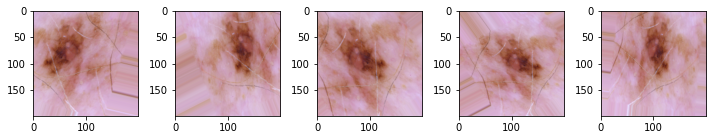

In [ ]:
# 2.1 Veamos las transformaciones que tuvo la imagen
augmented_images = [train_generator[0][0][0] for i in range(20)]
plotImages(augmented_images)

In [ ]:
# Step 3. Preparar la arquitectura con transfer learning
# 3.1 Descargar la red pre-entrenada de VGG16
vgg_model = VGG16(include_top=False, input_shape=(200, 200, 3))

# 3.2 Congelar las capas de la red pre-entrenada
for layer in vgg_model.layers:
    layer.trainable=False

# 3.3 Agregar unas capas adicionales para nuestra clasificación de cáncer
flat1 = Flatten()(vgg_model.layers[-1].output)
class1 = Dense(256, activation='relu')(flat1)
output = Dense(1, activation='sigmoid')(class1)
model = Model(inputs = vgg_model.inputs, outputs = output)

# 3.4. Mostrar el resumen de la arquitectura
model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                              

In [ ]:
# Step 4. Entrenar el modelo
# 4.1 Definir en la compilación la función loss, el optimizer y la métrica
model.compile(loss = 'binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# 4.2 Efectuar el entrenamiento (puede tardar algunos minutos)
history = model.fit(train_generator,
                    validation_data = valid_generator,
                    epochs=15, verbose=1)

Epoch 1/15
416/416 [==============================] - 514s 1s/step - loss: 0.5673 - accuracy: 0.7419 - val_loss: 0.3980 - val_accuracy: 0.8232
Epoch 2/15
416/416 [==============================] - 34s 82ms/step - loss: 0.4254 - accuracy: 0.7992 - val_loss: 0.4213 - val_accuracy: 0.8071
Epoch 3/15
416/416 [==============================] - 33s 80ms/step - loss: 0.4155 - accuracy: 0.8007 - val_loss: 0.3501 - val_accuracy: 0.8661
Epoch 4/15
416/416 [==============================] - 35s 85ms/step - loss: 0.3934 - accuracy: 0.8079 - val_loss: 0.4729 - val_accuracy: 0.7893
Epoch 5/15
416/416 [==============================] - 34s 81ms/step - loss: 0.3795 - accuracy: 0.8175 - val_loss: 0.3763 - val_accuracy: 0.8125
Epoch 6/15
416/416 [==============================] - 34s 81ms/step - loss: 0.3757 - accuracy: 0.8204 - val_loss: 0.3458 - val_accuracy: 0.8571
Epoch 7/15
416/416 [==============================] - 34s 81ms/step - loss: 0.3604 - accuracy: 0.8185 - val_loss: 0.3407 - val_accuracy: 

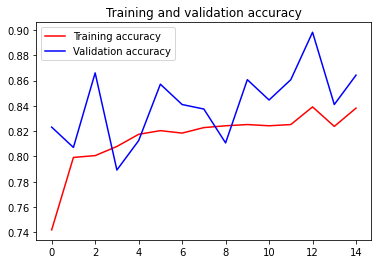

In [ ]:
# Paso 5. Evaluar las métricas del modelo en el set de aprendizaje y validación
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# 5.1 Crear gráfica comparativa de accuracy
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

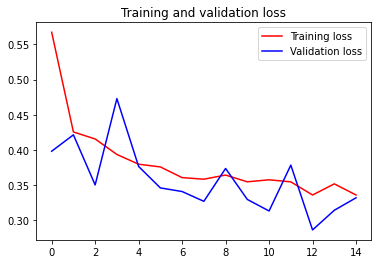

In [ ]:
# 5.2 Crear gráfica comparativa de loss
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.show()

In [ ]:
# 5.3 Realizar la predicción y evaluar el accuracy con el set de prueba
result = model.evaluate(test_generator)
print("test_loss, test accuracy", result)

132/132 [==============================] - 210s 2s/step - loss: 0.3383 - accuracy: 0.8439
test_loss, test accuracy [0.3383331596851349, 0.8439394235610962]


In [ ]:
# 5.3 Obtener las probabilidades y convertir a clases
y_pred_prob = model.predict(test_generator)
y_pred = np.rint(y_pred_prob).reshape((660,))
y_test = test_generator.classes

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       360
           1       0.82      0.84      0.83       300

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



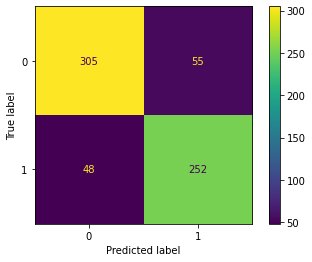

In [ ]:
# 5.4 Imprimir el reporte de la matriz de confusión y la gráfica
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [ ]:
# 5.5 Como hemos logrado un modelo aceptable, lo guardamos
model.save("VGG_cancer_piel.h5")
print("Modelo guardado")

Modelo guardado


## **4. Discusión de resultados y conclusiones**

### **4.1 Resumen operativo**
**Método:** Las imágenes clínicas de manchas de piel fueron etiquetadas como benignas o malignas, para ser procesadas mediante data augmentation a fin de obtener más muestras y luego entrenar un modelo con transfer learning en una arquitectura VGG16  
**Hallazgos:** Se obtuvo un accuracy de 83.48% para un dataset de prueba de n=660 imágenes. Nuestro clase positiva es "maligno" el cual tuvo un recall de 90%, un precision de 78% y un F1-score de 83%.  
**Interpretación:** 
El procesamiento de esta red neuronal se hizo en 2.1 horas. La información del gráfico de accuracy en los datos de aprendizaje y validación nos hacen notar un leve overfitting en el epoch 10. Nuestra clase positiva "maligno" nos muestra que nuestra predicción es correcta en la positividad el 77.52%.

### **4.2 Conclusiones**
- Podemos observar un mayor resultado del accuracy de predicción respecto a nuestro baseline de 72%, producto del uso del transfer learning
- Para este proyecto se entrenó el modelo sólo con 10 epochs, notando en la gráfica de accuracy vs. epochs un sostenido crecimiento del valor del training accuracy.
- Esta red fue de utilidad para mostrar que el uso de una red pre-entrenada con imágenes no relacionadas a medicina fue de utilidad para una tarea de clasificación de imágeners clínicas 

## **5. Bibliografía**
### **5.1 Citaciones**
[1] Centros para el Control y la Prevención de Enfermedades CDC. (25 de Agosto del 2022). *Información básica del cáncer de piel*, enlace https://www.cdc.gov/spanish/cancer/skin/basic_info/index.htm  

[2] Mayo Clinic. (25 de Agosto del 2022). *Cáncer de piel - Diagnóstico y Tratamiento*, enlace https://www.mayoclinic.org/es-es/diseases-conditions/skin-cancer/diagnosis-treatment/drc-20377608  

[3] American Cancer Society. (25 de Agosto del 2022). *Signos y síntomas del cáncer de piel tipo melanoma*, enlace de  https://www.cancer.org/es/cancer/cancer-de-piel-tipo-melanoma/deteccion-diagnostico-clasificacion-por-etapas/senales-y-sintomas.html  

[4] National Library of Medicine. (25 de Agosto del 2022). *Skin Cancer Detection: A Review Using Deep Learning Techniques*, enlace https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8160886/#!po=6.73077  

[5] ScienceDirect. (25 de Agosto del 2022). *Skin cancer detection: Applying a deep learning based model driven architecture in the cloud for classifying dermal cell images*, descargado de https://www.sciencedirect.com/science/article/pii/S2352914819302047  

[6] BMC Medical Imaging. (25 de Agosto del 2022). *Transfer learning for medical image classification: a literature review*, enlace https://bmcmedimaging.biomedcentral.com/articles/10.1186/s12880-022-00793-7  

[7]  Tensorflow. (25 de Agosto del 2022). *Transfer learning and fine-tuning*, enlace https://www.tensorflow.org/tutorials/images/transfer_learning  

[8]  Medium. (25 de Agosto del 2022). *Image Classification Using Transfer Learning (VGG-16)*, enlace https://medium.com/nerd-for-tech/image-classification-using-transfer-learning-vgg-16-2dc2221be34c. Nota: El autor no consigna el enlace del dataset en Kaggle  

[9] MDPI. (25 de Agosto del 2022). *Deep Transfer Learning for Modality Classification of Medical Images*, enlace https://www.mdpi.com/2078-2489/8/3/91/htm

### **5.2 Créditos de imágenes**
[i.1] American Academy of Dermatology AAD. (28 de Agosto del 2022). *Pictures of Melanoma*, descargado https://www.aad.org/public/diseases/skin-cancer/types/common/melanoma/symptoms. URL de la imagen: https://images.ctfassets.net/1ny4yoiyrqia/euJvSEAs5Qd0Zansym1gi/7dff363bf4546b8a56e1cf185a1a0950/melanoma-symptoms-sore.png?fm=webp&w=450&h=450   

[i.2] Imágen propia, tomada por el autor.

### **5.3 Apéndice**
- Notas sobre Transfer Learning: https://becominghuman.ai/using-keras-imagedatagenerator-with-transfer-learning-c4787d430060  
- Paper: Skin cancer detection by deep learning and sound analysis algorithms: A prospective clinical study of an elementary dermoscope: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6562065/pdf/main.pdf  
- Sobre la función Flow_From_Directory: https://studymachinelearning.com/keras-imagedatagenerator-with-flow_from_directory/  